In [1]:
from LFC.Hardware.Waveshaper import Waveshaper
ws = Waveshaper(addr='SN201904')
ws.connect()

Finisar Waveshaper SN201904 connected


1

In [2]:
from scipy.io import loadmat
r = loadmat(r'Z:\Maodong\Projects\Keck\Filter Cavity test\20220819-LockToFC-useSRS\overnightRun_3_2\00000_Cavity_output_FCT_20.52C_FCV_0.520_RioTset_22.86C_RioTact_22.83C.mat')

Finisar Waveshaper SN201904: inverseAtten: input is spectrum envelop instead of frequency comb, NO peak search is performed.


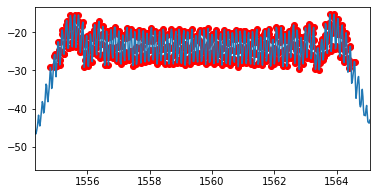

Waveshaper Set atten to BandPass [191.56067603833867~192.79257749196142] THz ([1565.000~1555.000] nm)
 Inverse Attenuation is applied with max attenuation 10 dB..


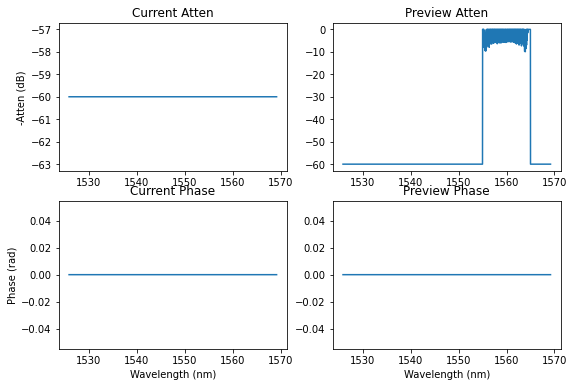

In [8]:
import matplotlib.pyplot as plt
osa_wl, osa_pw = r['OSAWavelength'], r['OSAPower']

ws.inverseAtten(osa_wl, osa_pw, max_atten_db=10, bandpass_span=10, perform_peak_search=0)
ws.plotStatus(unit='nm')

In [2]:
299792458/1560/1000-299792458/(1560-0.25)/1000

-0.03080215620519766

ValueError: min() arg is an empty sequence

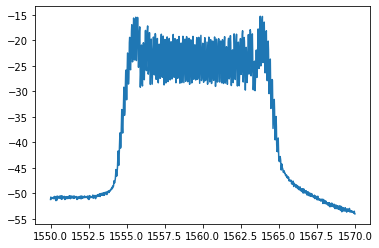

In [9]:
import numpy as np 
np.mean(np.diff(osa_wl.flatten()))
osa_wl_center=1560
osa_wl_FSR=16
c_const=299792458
osa_wl_center-1/(1/osa_wl_center+osa_wl_FSR/c_const)

dist = (osa_wl_center-1/(1/osa_wl_center+osa_wl_FSR/c_const))/np.mean(np.diff(osa_wl.flatten()))
noise = -30

from scipy.signal import find_peaks
pos,_ = find_peaks(osa_pw.flatten(),height=0,distance=0.9*dist)

plt.plot(osa_wl,osa_pw)
plt.scatter(osa_wl[pos],osa_pw[pos],color='red')
plt.xlim([min(osa_wl[pos])-0.05*np.ptp(osa_wl[pos]),max(osa_wl[pos])+0.05*np.ptp(osa_wl[pos])])

In [12]:
if not pos.size>0:
    print('ad')

ad


In [5]:
osa_pw[osa_pw>-30]

array([-29.2 , -28.77, -26.2 , -25.84, -29.04, -28.85, -25.97, -22.51,
       -22.59, -24.75, -28.58, -27.37, -25.15, -20.47, -19.44, -20.82,
       -25.61, -25.78, -22.83, -20.92, -18.15, -16.97, -19.36, -24.23,
       -24.14, -20.77, -18.19, -15.65, -16.92, -22.46, -23.85, -21.04,
       -18.67, -16.1 , -15.49, -20.04, -23.98, -21.26, -19.73, -17.13,
       -15.53, -17.24, -22.48, -25.3 , -23.64, -21.24, -18.27, -17.38,
       -21.86, -29.2 , -27.38, -25.56, -22.89, -20.94, -23.21, -28.37,
       -28.95, -26.81, -24.59, -20.5 , -21.42, -24.16, -27.73, -25.46,
       -21.53, -19.44, -18.08, -20.31, -24.27, -25.95, -22.87, -20.97,
       -18.1 , -17.2 , -20.73, -26.64, -25.96, -23.2 , -20.61, -18.51,
       -20.71, -25.8 , -28.66, -26.78, -24.3 , -19.77, -21.66, -24.93,
       -28.6 , -26.39, -24.  , -21.22, -19.38, -20.76, -25.68, -26.78,
       -24.31, -19.68, -18.7 , -18.88, -23.85, -27.66, -26.03, -23.93,
       -20.49, -19.66, -23.06, -27.62, -28.34, -25.85, -23.69, -20.77,
      

In [30]:
pos[0]

array([  1,   5,   9,  13,  16,  19,  23,  28,  31,  34,  38,  41,  45,
        48,  52,  56,  60,  63,  67,  70,  74,  77,  81,  85,  88,  91,
        93,  96,  99, 103, 105, 111, 113, 117, 121, 125, 128, 131, 136,
       139, 143, 146, 150, 154, 157, 161, 165, 169, 172, 175, 179, 183,
       187, 190, 194, 197, 199, 202, 205, 209, 215, 222, 228, 234, 241,
       248, 253, 260, 267, 273, 280, 286, 293, 299, 305, 312, 319, 325,
       331, 338, 344, 351, 357, 364, 370, 376, 383, 390, 396, 403, 409,
       416, 422, 429, 435, 442, 447, 455, 461, 468, 474, 481, 487, 494,
       500, 507, 514, 520, 526, 533, 539, 545, 552, 559, 565, 572, 578,
       585, 591, 598, 603, 611, 617, 624, 631, 636, 643, 650, 656, 663,
       670, 676, 682, 689, 696, 702, 709, 715, 722, 728, 735, 741, 745,
       748, 754, 760, 767, 770, 775, 778, 782, 785, 790, 794, 797, 801,
       805, 808, 812, 816, 820, 824, 828, 832, 835, 840, 844, 847, 851,
       855, 859, 863, 867, 871, 874, 878, 882, 886, 890, 893, 89

Waveshaper Set atten to BandPass [189.675~194.675] THz ([1580.559~1539.964] nm).
Waveshaper writing error: -38


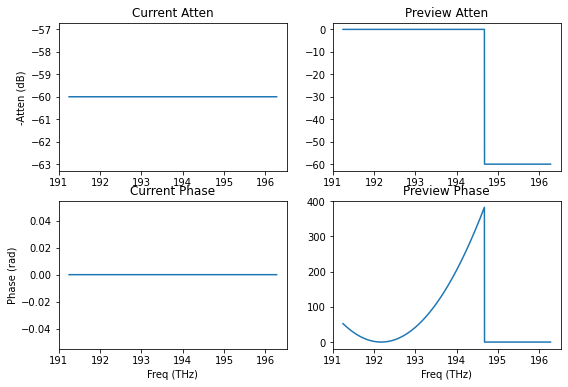

In [8]:
ws.set3rdDisper(d2=2.4, d3=-0., preview_plot=0)
ws.setBandPass(span=5)
# ws.plotStatus()
ws.writeProfile()
ws.plotStatus()

In [ ]:
pos

In [9]:
ws.set2ndDisper(d2=2.1, preview_plot=0)
ws.writeProfile()

Waveshaper writing error: -38
